### Three principle component analysis 

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [3]:
wine = pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
#Coverting into numpy array
wines = wine.values
wines

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
#normalizing the numerical data
wines_normal = scale(wines)

In [8]:
wines_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
pca = PCA()
pca_values = pca.fit_transform(wines_normal)

In [10]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [12]:
pca = PCA(n_components= 14)
pca_values = pca.fit_transform(wines_normal)

In [13]:
#variance
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [16]:
#cumlative variance
var1 = np.cumsum(np.round(var,decimals= 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [17]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

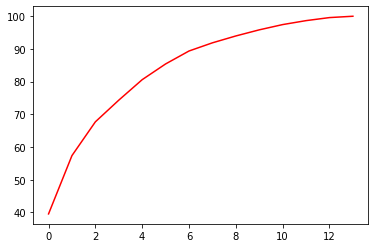

In [18]:
plt.plot(var1,color='red')

In [19]:
pca_values[:,0:3]

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

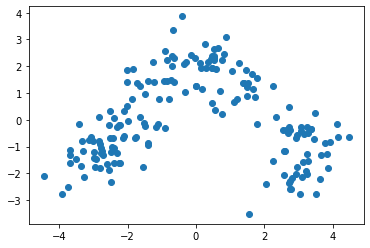

In [20]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [21]:
finaldf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2'])],axis=1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

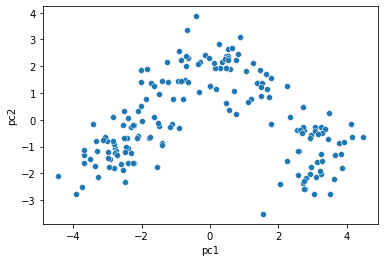

In [23]:
import seaborn as sns
sns.scatterplot(data=finaldf,x='pc1',y='pc2')

### heirarchial and k mean clustering 

In [24]:
from pycaret.clustering import *

### Heirarchical  

In [29]:
exp = setup(data = wine, pca=True)
hierarchical = create_model('hclust',)
hierarchical_df = assign_model(hierarchical)
hierarchical_df

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.568,701.3451,0.5329,0,0,0


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cluster 0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cluster 0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cluster 0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cluster 2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Cluster 3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Cluster 3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Cluster 0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Cluster 0


In [30]:
hierarchical_df.Cluster.value_counts()

Cluster 3    59
Cluster 1    57
Cluster 0    42
Cluster 2    20
Name: Cluster, dtype: int64

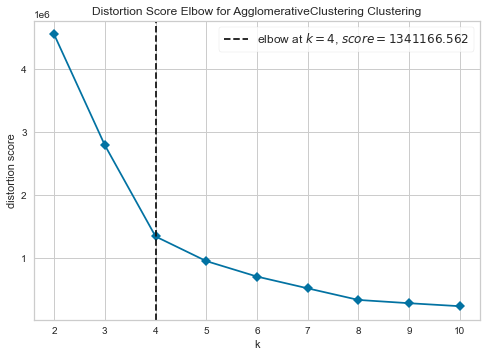

In [33]:
plot_model(hierarchical, plot='elbow')

### K-means 

In [36]:
kmeans = create_model('kmeans')
kmeans_df = assign_model(kmeans)
kmeans_df

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.575,725.5317,0.5301,0,0,0


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cluster 1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cluster 1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cluster 2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cluster 2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Cluster 3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Cluster 3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Cluster 3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Cluster 3


In [37]:
kmeans_df.Cluster.value_counts()

Cluster 0    66
Cluster 3    57
Cluster 1    32
Cluster 2    23
Name: Cluster, dtype: int64

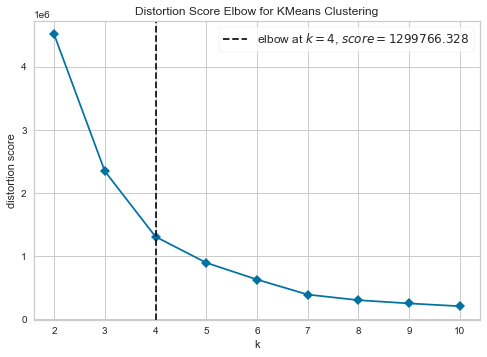

In [38]:
plot_model(kmeans,plot='elbow')